In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
from pathlib import Path
import PIL
import os
from time import gmtime, strftime

In [2]:
def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(img))
def show_plt(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [3]:
read_range = (3840,4060)
im_path = "data/North Cropped/"
#im_path = "light_enhancement_Results/LIMEOutput/"

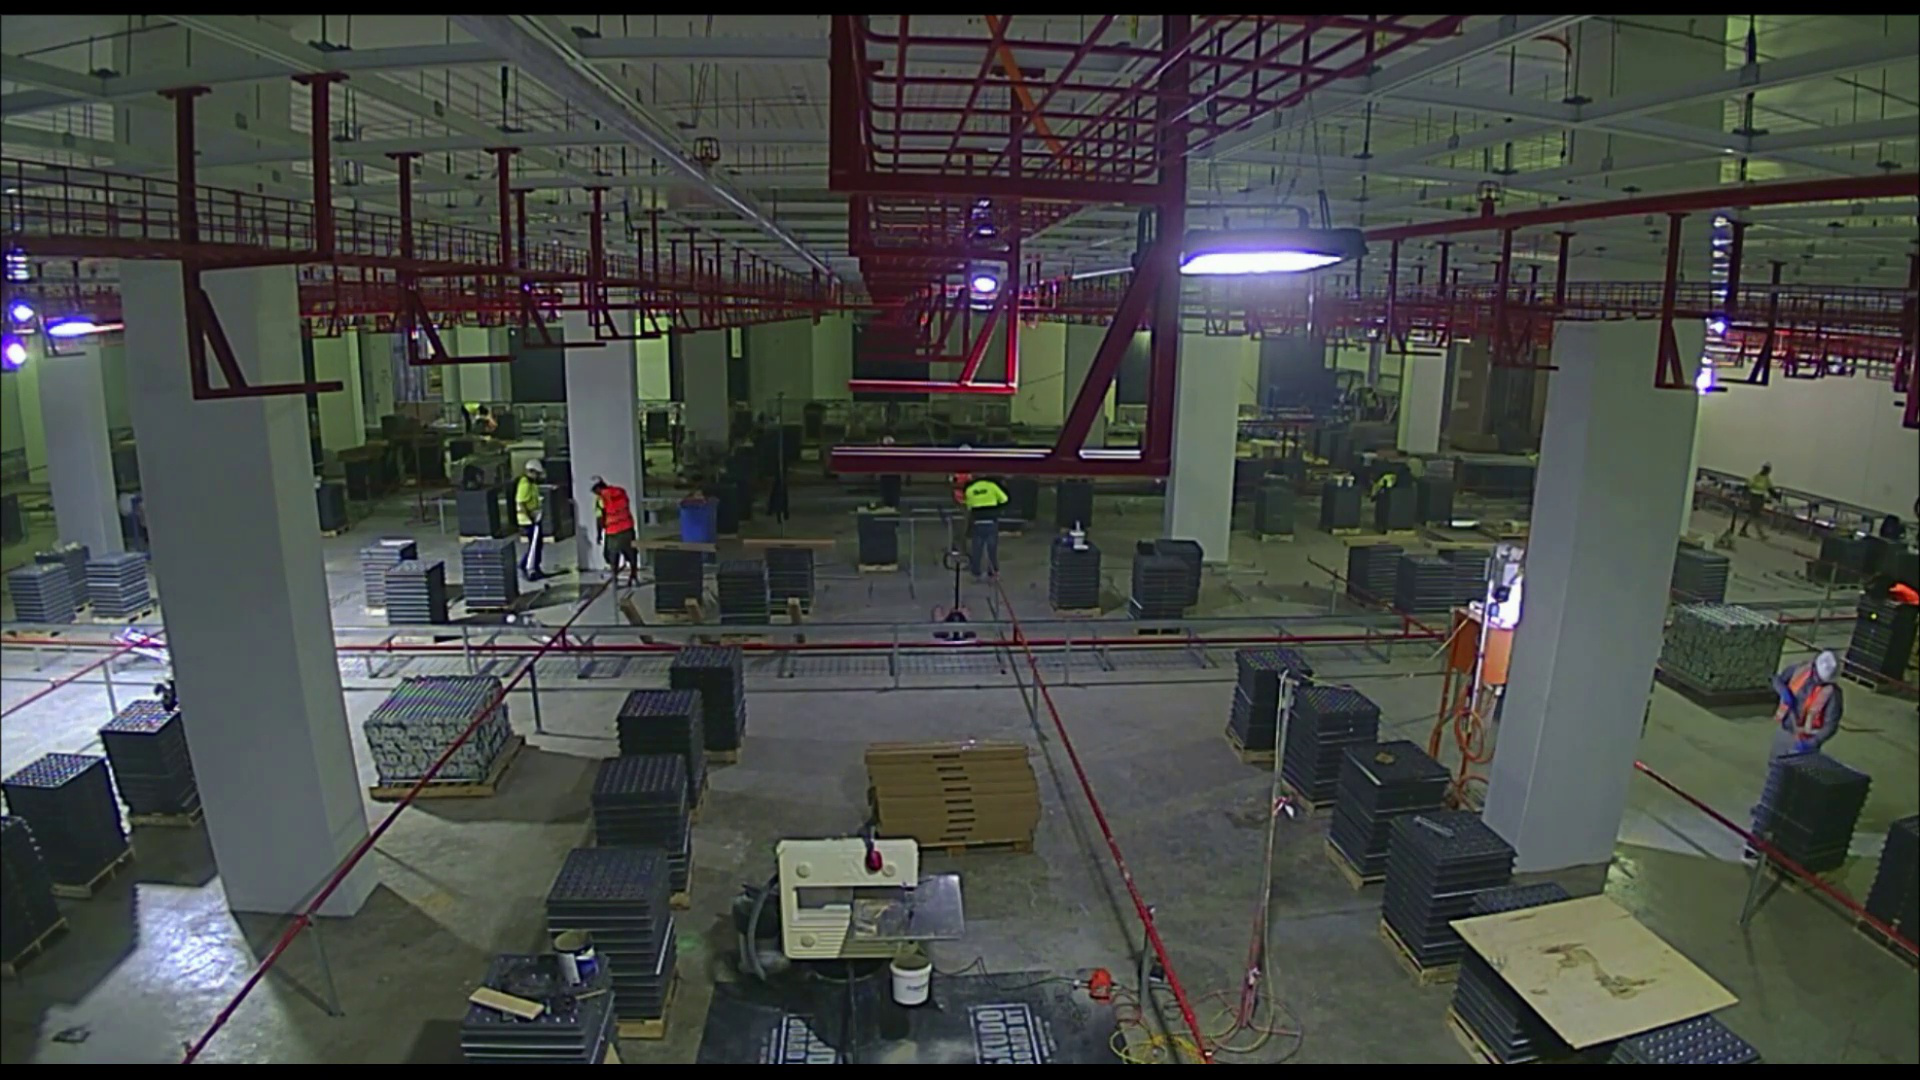

In [4]:
imgnumber = 3840
img = cv2.imread(im_path+str(imgnumber)+".jpg")
show(img)

In [5]:
img2 = np.zeros(img.shape[:2])
print(img2.shape)
print(np.max(img[20,20,:]))
print(img.shape)
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        img2[x,y] = np.max(img[x,y,:])

(1080, 1920)
87
(1080, 1920, 3)


In [6]:
img2 = img2.astype('uint8')

img3 = img2[:,:] / np.max(img2)
print(img3[20,60])

0.34901960784313724


uint8


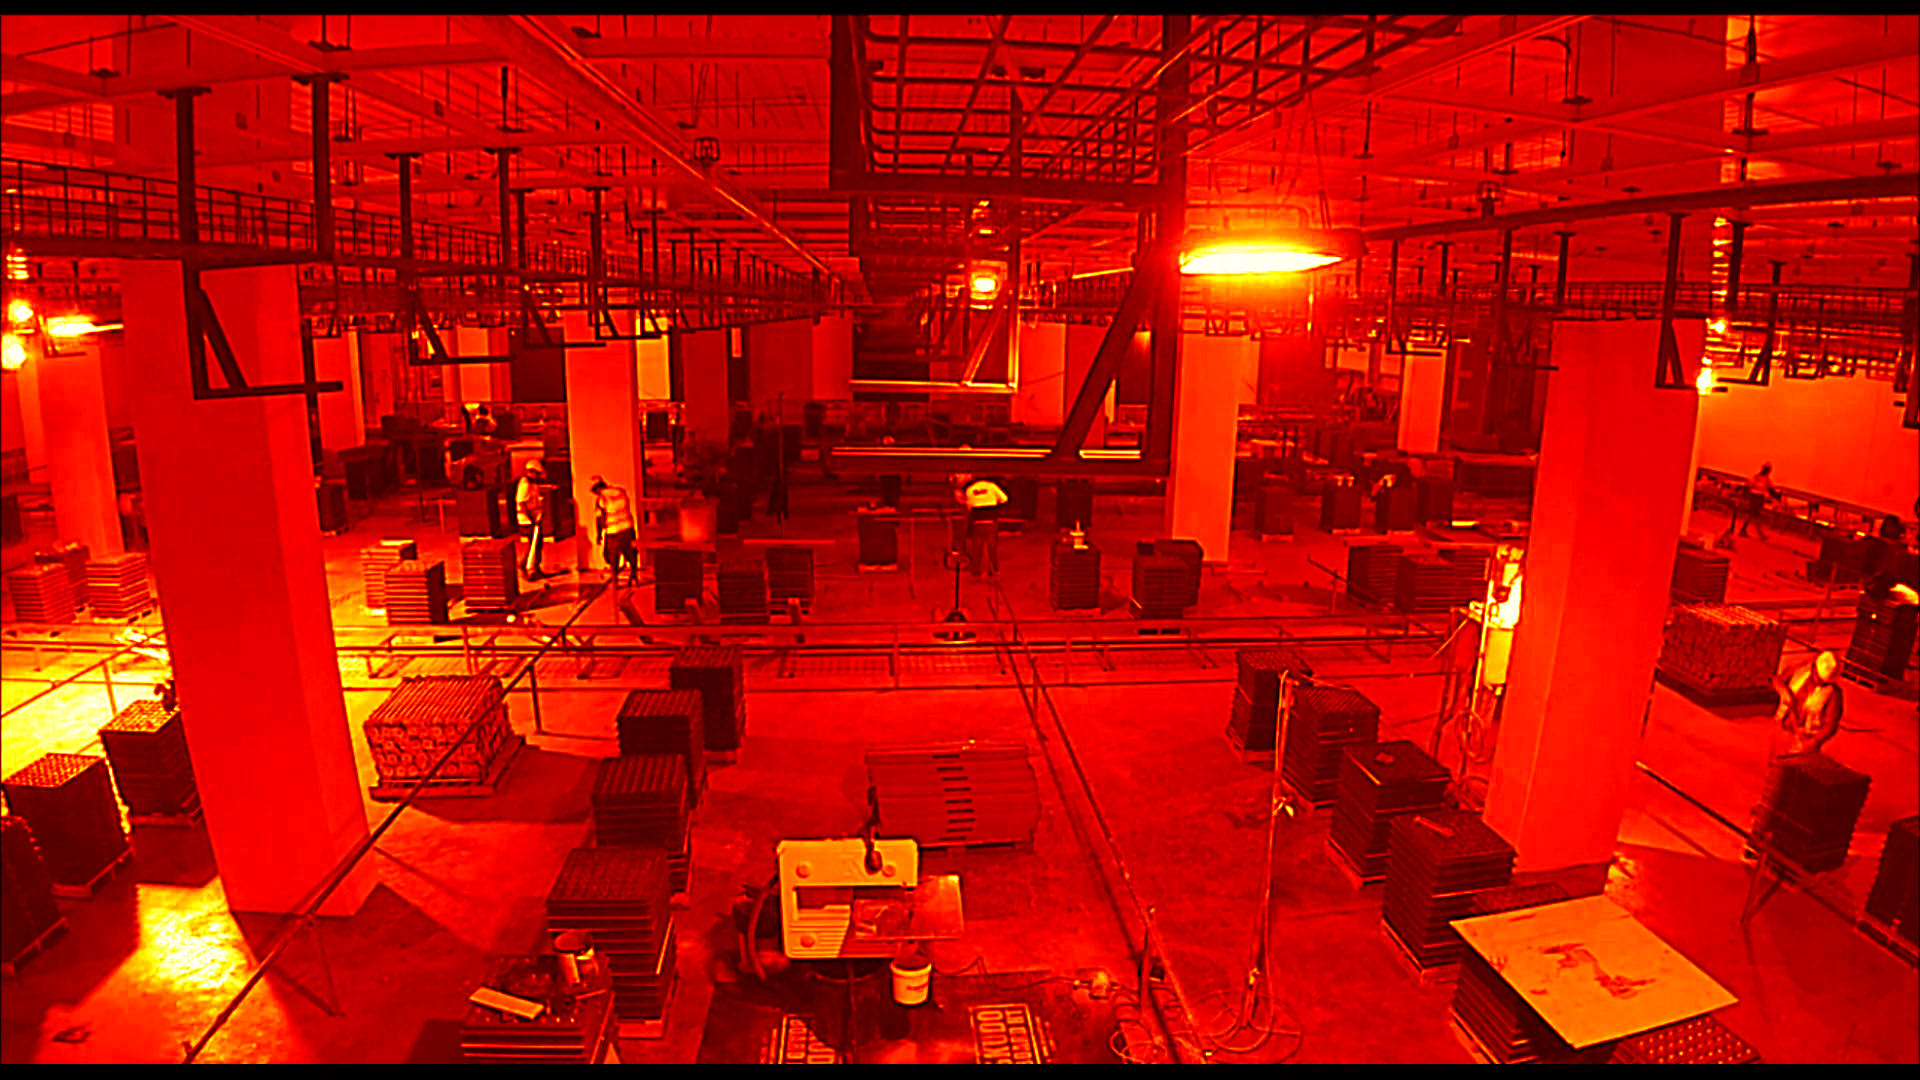

In [7]:
img4 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #test
print(img2.dtype)
img5 = cv2.applyColorMap(img2, cv2.COLORMAP_HOT)
show(img5)

In [8]:
cv2.imwrite("flow_results/HeatMap/"+str(imgnumber)+" HOT.jpg", img5)

True

In [9]:
imgnumber = 3840
img = cv2.imread(im_path+str(imgnumber)+".jpg")

(1080, 1920, 3)


False

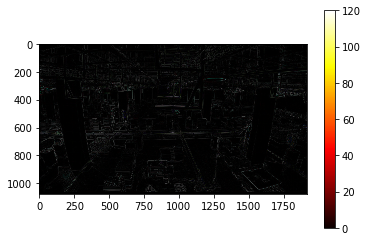

In [10]:
vgrad = np.gradient(img)
fulgrad = np.sqrt(vgrad[0]**2 + vgrad[1]**2)
print(fulgrad.shape)
fulgrad = fulgrad.astype('uint8')

#my_dpi=96
#plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi, frameon=False)
plt.imshow(fulgrad,cmap=plt.get_cmap('hot'), vmin = np.amin(fulgrad),vmax = np.amax(fulgrad))  
plt.colorbar()
plt.savefig('out.png', transparent = False, bbox_inches = 'tight', pad_inches = 0)
cv2.imwrite('flow_results/smoothness/s'+str(imgnumber)+'.jpg',fulgrad)
#plt.show()

-95.0
(1080, 1920, 3)
1.4142135623730951 0.019989258653197516
(1080, 1920, 3)
(1080, 1920)
255.0 3.658910771412556


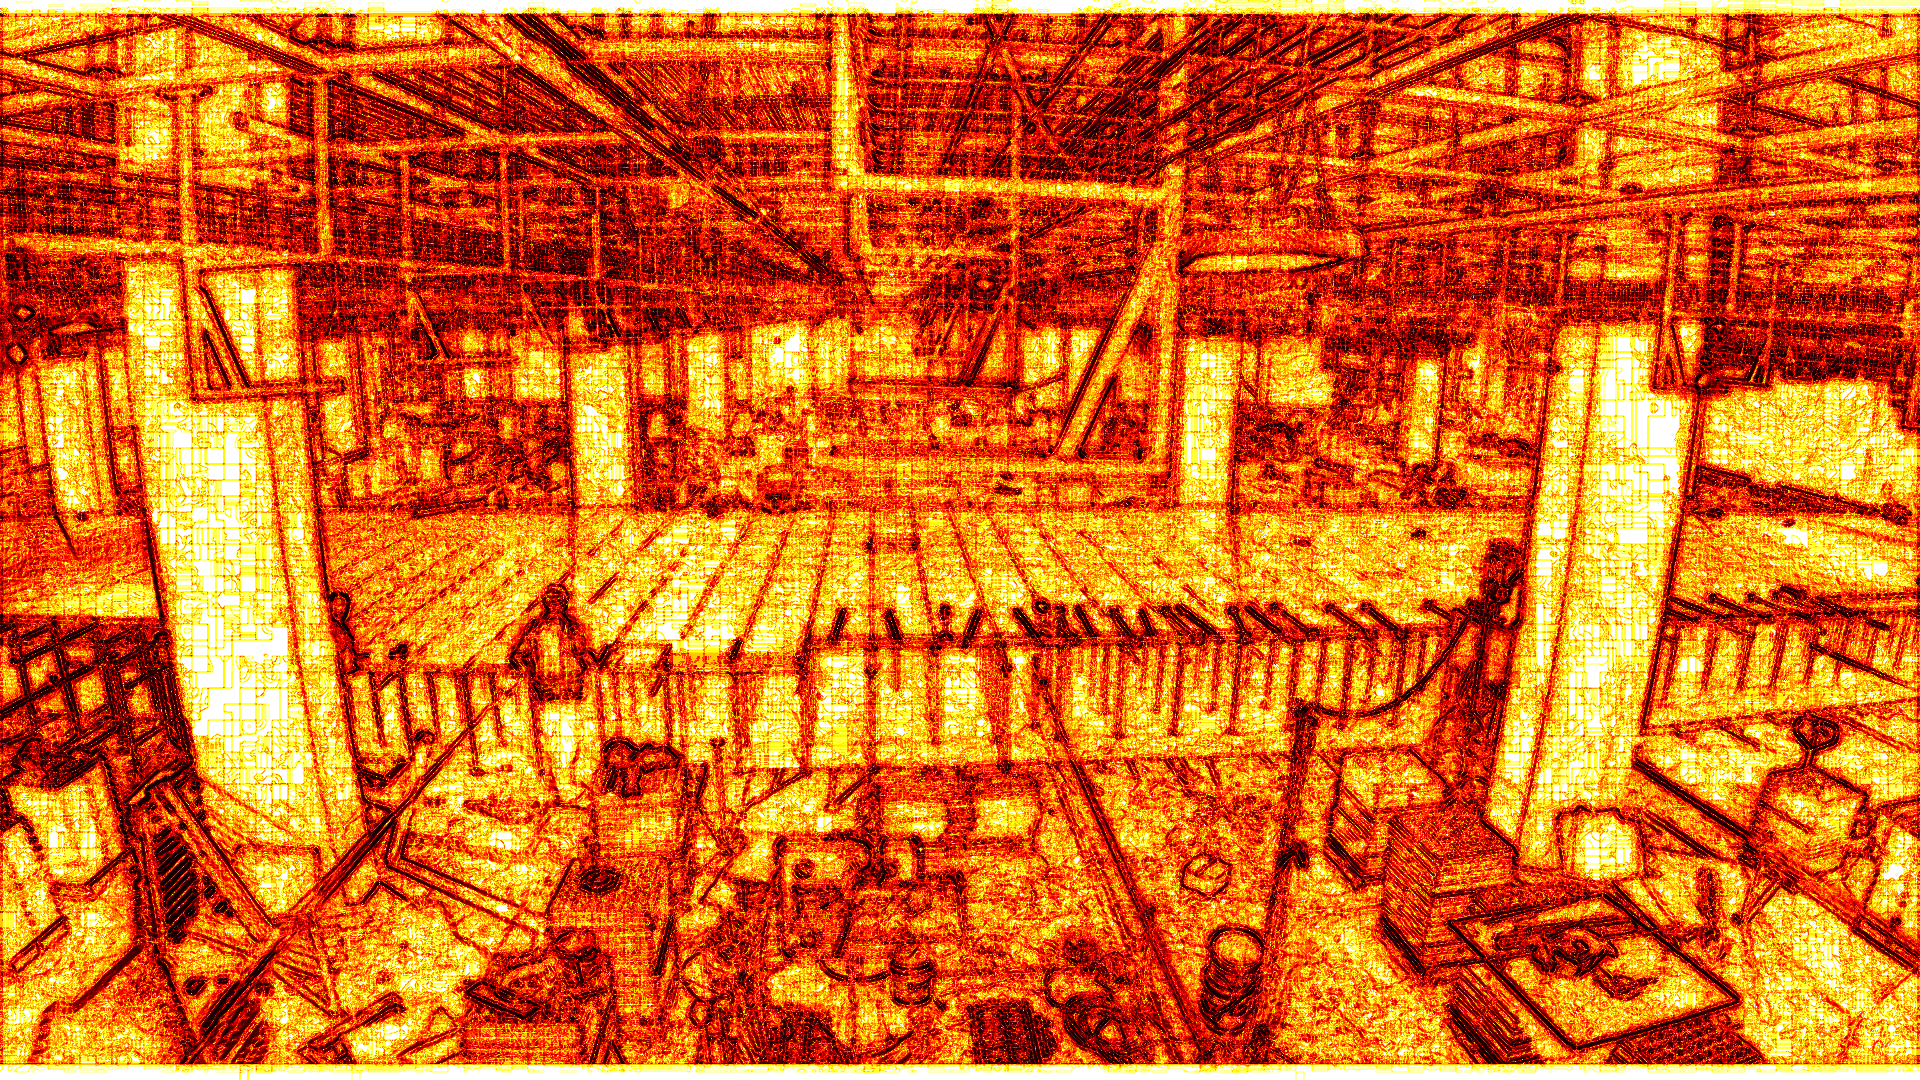

True

In [12]:
imgnumber = 3980
im_path = "data/North Cropped/"
#im_path = 'data/East 4 original location/frame'
img = cv2.imread(im_path+str(imgnumber)+".jpg")
vgrad = np.gradient(img)
epsilon = 1
print(vgrad[0].min())
Wx = 1/(np.abs(vgrad[0]) + epsilon)
Wy = 1/(np.abs(vgrad[1]) + epsilon)
Wmg = np.sqrt(Wx**2 + Wy**2)
print(Wmg.shape)
print(Wmg.max(), Wmg.min())
WmgAdj = (Wmg / Wmg.max()) * 255
print(WmgAdj.shape)
WmgAvg = np.apply_over_axes(np.average, WmgAdj, [2])
WmgAvg = WmgAvg.reshape((1080,1920))
print(WmgAvg.shape)
print(WmgAvg.max(), WmgAvg.min())
WmgAvg = WmgAvg.astype('uint8')
WmgHeatMap = cv2.applyColorMap(WmgAvg, cv2.COLORMAP_HOT)
show(WmgHeatMap)
#plt.imshow(WmgAvg,cmap=plt.get_cmap('hot'), vmin = np.amin(WmgAvg),vmax = np.amax(WmgAvg))
cv2.imwrite('flow_results/HeatMap/w '+str(imgnumber)+'.jpg',WmgHeatMap)


In [13]:
def get_lum(I):
    a = np.apply_over_axes(np.max, I, [2])
    a = a.reshape((1080,1920))
    return a

In [23]:
im_path = "data/North Cropped/"
#im_path = 'data/East 4 original location/frame'
im_path_lime = "data/After LIME/"
#im_path_lime = 'data/East 4 original location LIME/frame'
imgnumber = 3980
for imgnumber in [3980, 3970, 3960, 3950, 3940, 3930, 3920, 3910, 3900, 3890, 3880, 3870, 3860, 3850]:
    img = cv2.imread(im_path+str(imgnumber)+".jpg")
    img_lime = cv2.imread(im_path_lime+str(imgnumber)+".jpg")
    lum = get_lum(img)
    lum_lime = get_lum(img_lime)

    lum_dif = lum_lime - lum

    lum_hot = cv2.applyColorMap(lum_dif, cv2.COLORMAP_HOT)
    #show(lum_hot)
    cv2.imwrite('flow_results/HeatMap/t '+str(imgnumber)+'.jpg',lum_hot)

In [22]:
import scipy
from scipy import interpolate
vgrad = np.gradient(img)
(ly,lx,lz) = img.shape
xgrad = vgrad[0]
print(xgrad.shape)
x, y = range(0, lx), range(0,ly)
xi, yi = np.meshgrid(x, y)
print(xi.shape)
print(yi.shape)
rbf = scipy.interpolate.Rbf(xi, yi, xgrad)
plt.imshow(v, vmin = np.amin(xgrad), vmax=np.amax(xgrad))
plt.colorbar()
plt.show() 

(1080, 1920, 3)
(1080, 1920)
(1080, 1920)


ValueError: All arrays must be equal length.